In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
PATH="Dataset/diabetes.csv"

def load_data(path=PATH):
    col_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
    return pd.read_csv(PATH, header=None,  names=col_names)




In [2]:
diabetes=load_data()
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.472396,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331242,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


          pregnant   glucose        bp      skin   insulin       bmi  \
pregnant  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683   
glucose   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071   
bp        0.141282  0.152590  1.000000  0.207371  0.088933  0.281805   
skin     -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573   
insulin  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859   
bmi       0.017683  0.221071  0.281805  0.392573  0.197859  1.000000   
pedigree -0.033542  0.136990  0.041965  0.184587  0.185387  0.141157   
age       0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242   
label     0.221898  0.466581  0.065068  0.074752  0.130548  0.292695   

          pedigree       age     label  
pregnant -0.033542  0.544341  0.221898  
glucose   0.136990  0.263514  0.466581  
bp        0.041965  0.239528  0.065068  
skin      0.184587 -0.113970  0.074752  
insulin   0.185387 -0.042163  0.130548  
bmi       0.141157  0.036242  0.2

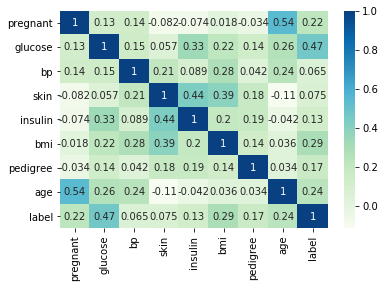

In [5]:
corr = diabetes.corr()
print(corr)
sns.heatmap(corr, annot=True, cmap="GnBu")

In [6]:
#only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b815cd0>,
      dtype=object)

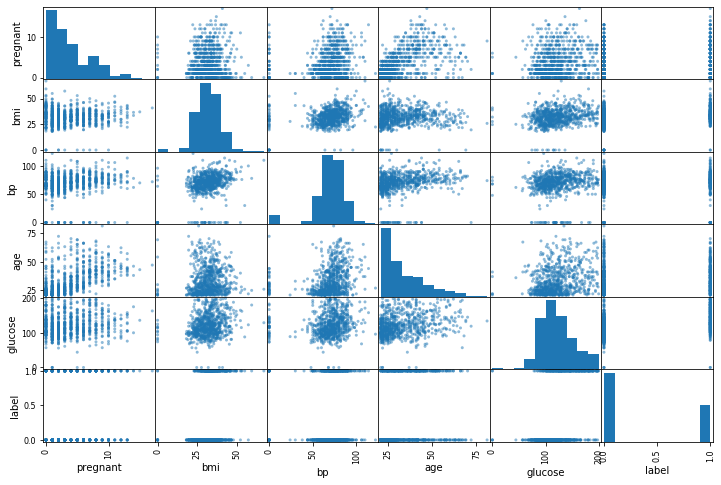

In [7]:
import pandas as pd
attributes = ["pregnant", "bmi", "bp",
"age", "glucose", "label"]
pd.plotting.scatter_matrix(diabetes[attributes], figsize=(12, 8))

In [8]:
#clean data optional

#col_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#dataset=pd.read_csv(PATH, header=None)
# mark zero values as missing or NaN
#diabetes[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)
# drop rows with missing values
#diabetes.fillna(diabetes.mean(), inplace=True)
# summarize the number of rows and columns in the dataset
#print(diabetes.shape)

In [9]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

Training Using Support Vector Machine

In [10]:
#split the dataset into training and testing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


In [11]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [12]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', decision_function_shape='ovr')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
#pred=perceptron.predict(x_test)
y_pred = svclassifier.predict(X_test)

In [14]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.8247


In [16]:
test=[[6, 148,72, 35, 155, 33, 0.63, 50]]
y_pred=svclassifier.predict(test)
print(y_pred)

[1]


Text(0.5, 0, 'Importance')

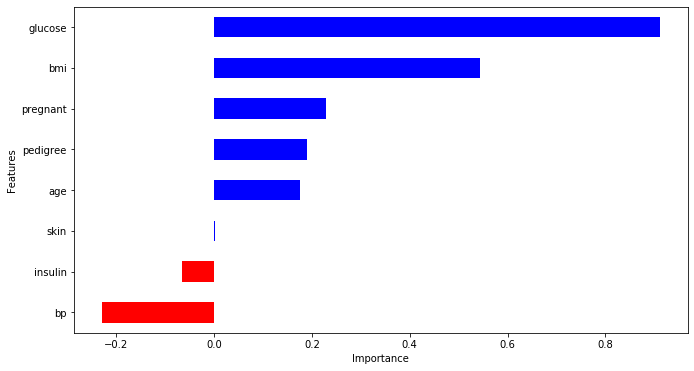

In [17]:
coeff = list(svclassifier.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')